<a href="https://colab.research.google.com/github/CiaraFarrellSETU/-SEM2---Data-Analytics-and-Algorithms/blob/main/Gradient_descent_for_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Ciara Farrell  
Student ID: C00294114

This notebook looks at gradient descent using neural networks for linear data.  
In gradient descent the following can be changed  
* the learning rate: is a hyperparameter which can be used to determine the step size taken in each iteration. This influencing the speed and stability of convergence  
* iterations: how many steps are taken by the model.  
* weights: the weights are changed after the gradient of the entrie dataset is calculated.  
* dataset: this can be changed based on what is being analysied or personal preference

To begin with the needed modules will be
imported.  
Preprocessing from sklearn provides several common utility functions and transformer classes to change raw feature vectors into a representation, it can also be used to Standardise the dataset along any chosen axis

In [ ]:
from sklearn import preprocessing
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

From https://colab.research.google.com/github/mravanba/comp551-notebooks/blob/master/GradientDescent.ipynb#scrollTo=fa3GgubSfY2R the code is found to classify the gradient descent model.  
It's learning rate is set to 5%.   
The maximun number of iterations is the number of repetitions for the model to converge.  
Epsilon is a percision value set.  
Self.w_history is an optional extra which can be used to record the history of model weight parameter's during gradient descent.  
Grad=gradient is used to find the gradient with the current weight.  
the weight is then updated in the model.

In [ ]:
class GradientDescent:

    def __init__(self, learning_rate=.05, max_iters=1e6, epsilon=1e-6, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []

    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)
            w = w - self.learning_rate * grad
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

The linear regression calss is then defined.  
The gradient function is defined and at the begining the parameter weights are set to 0.  
The model optimiser is then ran to find the best parameter weights for the model.

In [ ]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def gradient(x, y, w):                          # define the gradient function
            yh =  x @ w
            N, D = x.shape
            grad = .5*np.dot(yh - y, x)/N
            return grad
        w0 = np.zeros(D)                                # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self

    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

Now using https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931 it is possible to implement linear regression using gradient descent.  
Importing the dataset from github and reading the csv into a pandas dataframe.

In [ ]:
data = 'https://raw.githubusercontent.com/ScalarPy/linear_regression_gradient_descent/main/Salary_Data.csv'
dataset = pd.read_csv(data)

Checking the first five rows of the dataframe.

In [ ]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


By using seaborn it is possible to visualise the data in the form of a scatterplot.  
The x variable is the number of years of work experince and the y variable is average salary.  
From the plot it can be seen that the data has a linear relationship.

<Axes: xlabel='YearsExperience', ylabel='Salary'>

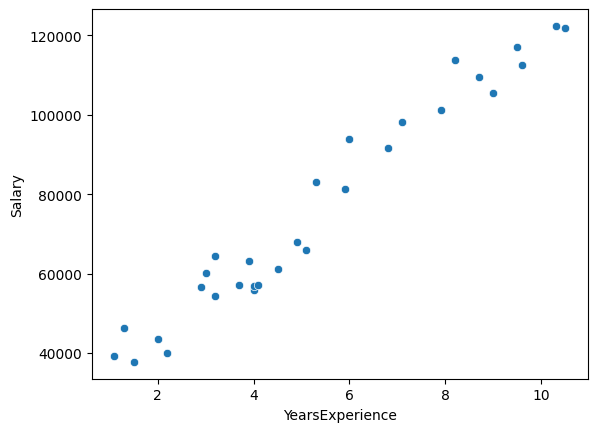

In [ ]:
sns.scatterplot(data=dataset, x="YearsExperience", y="Salary")

Assigning the first column yearsexperince to x and the second column salary to y

In [ ]:
x = dataset.iloc[:, 0]
y = dataset.iloc[:, 1]


Now the model needs to be built for the dataset.  
To begin with a random m and c value is selected by using random.randint, this returns a randomly selected number from 0 to 1000.  
Similarly to the predefined gradient descent classifier the learning rate is 5% and the number of iterations is 1e6.   
Gradient descent is then used to predict a value for y.  
The actual vlaues for m and c are then printed

In [ ]:
m = random.randint(0,1000)
c = random.randint(0,1000)

L = 0.05
epochs = 1e6

n = float(len(X))

for i in range(epochs):
    Y_pred = m*X + c
    D_m = (-2/n) * sum(X * (Y - Y_pred))
    D_c = (-2/n) * sum(Y - Y_pred)
    m = m - L * D_m
    c = c - L * D_c
print (m, c)

12836.600965885045 2915.2044856014018


Using the predicted y value the linear regression line is then fitted to the data.

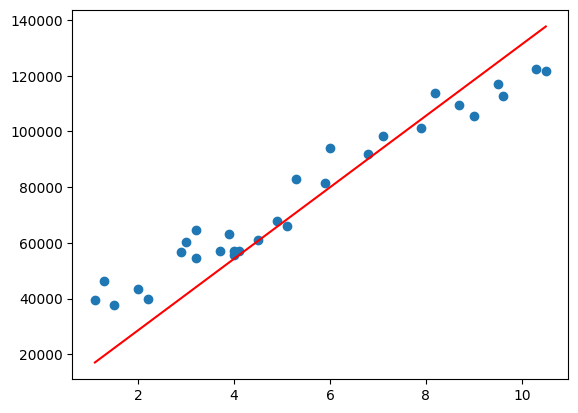

In [ ]:

Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.metrics import mean_squared_error

Getting the mean squared error loss and the root mean squared error loss for the regression.  
The root mean squared error loss is just the square root of the MSE

In [ ]:
lr = 0.05
iterations = 1e6

for i in range(iterations):

    #calculate y_pred
    y_pred_train = (m * x_train) + c


    #Caculate Derivatives
    dm =  - (2 / n) * sum(x_train * (y_train - y_pred_train))
    dc =  - (2 / n) * sum((y_train - y_pred_train))

    #Update m,c values
    m = m - (lr * dm)
    c = c - (lr * dc)

    #Caculate MSE Value
    mse = mean_squared_error(y_train,y_pred_train)
    rmse = np.sqrt(mse)
    print("Iter::",i,"MSE::",mse,"RMSE::",rmse)



print("MSE",mse)

Iter:: 0 MSE:: 155474526.2334189 RMSE:: 12468.942466521325
Iter:: 1 MSE:: 153251018.72235367 RMSE:: 12379.459548879897
Iter:: 2 MSE:: 152173244.11483973 RMSE:: 12335.851981717344
Iter:: 3 MSE:: 151353511.08857736 RMSE:: 12302.58148067215
Iter:: 4 MSE:: 150594788.86065474 RMSE:: 12271.706843819842
Iter:: 5 MSE:: 149853325.99661222 RMSE:: 12241.459308293772
Iter:: 6 MSE:: 149119388.70278433 RMSE:: 12211.444988320765
Iter:: 7 MSE:: 148390792.91939992 RMSE:: 12181.575962058436
Iter:: 8 MSE:: 147667030.2625809 RMSE:: 12151.832382919907
Iter:: 9 MSE:: 146947964.3860195 RMSE:: 12122.209550491178
Iter:: 10 MSE:: 146233541.6618453 RMSE:: 12092.706134767574
Iter:: 11 MSE:: 145523726.97067618 RMSE:: 12063.321556299334
Iter:: 12 MSE:: 144818489.4504489 RMSE:: 12034.055403331367
Iter:: 13 MSE:: 144117799.33267385 RMSE:: 12004.907302127487
Iter:: 14 MSE:: 143421627.23934117 RMSE:: 11975.876888117262
Iter:: 15 MSE:: 142729944.02592975 RMSE:: 11946.963799473477
Iter:: 16 MSE:: 142042720.74561897 RMSE:

Printing the found values for m and c

In [ ]:
m,c

(9460.65188487301, 25841.682548674882)

By using the predicted m and c values it will be possible to find the predicited y value using a predefined x value

In [ ]:
x=15
y_p = c + m * (x)
y_p

167751.46082177002

I would like to visualise the jumps taken in gradient descent so by using https://peterroelants.github.io/posts/neural-network-implementation-part01/ it was possible to do this.  
Importing needed modules

In [ ]:
# Imports
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

I will create a random dataset that will sample 45 input samples with a distribution from 0 to 1.  
I will define a fuction that represents the line generated by multipling the generated x values by 3.  
Some random noise is created and added to the f function

In [ ]:

x = np.random.uniform(0, 1, 45)

def f(x):
    return x * 3

noise_variance = 0.15
noise = np.random.randn(x.shape[0]) * noise_variance
t = f(x) + noise

Now the x and t values will be plotted against eachother.  
A line is plotted through the points

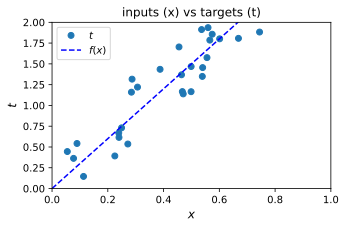

In [ ]:

plt.figure(figsize=(5, 3))
plt.plot(x, t, 'o', label='$t$')

plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('inputs (x) vs targets (t)')
plt.legend(loc=2)
plt.show()

The nerual network mean square error function is defined by x * w , where w is the parameter weights.  
The loss is defined by t minsus the predicted y vales squared.

In [ ]:
def nn(x, w):
    """Output function y = x * w"""
    return x * w


def loss(y, t):
    """MSE loss function"""
    return np.mean((t - y)**2)

Now it is possible to plot the loss by its weight.  
The plot goes from -2 to 8 on the x-axis.

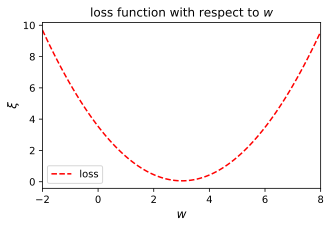

In [ ]:

ws = np.linspace(-2, 8, num=100)  # weight values
loss_ws = np.vectorize(lambda w: loss(nn(x, w) , t))(ws)


plt.figure(figsize=(5, 3))
plt.plot(ws, loss_ws, 'r--', label='loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('loss function with respect to $w$')
plt.xlim(-2, 8)
plt.legend()
plt.show()


Gradient descent is defined and the change of weight is defind to.  
The inital weight parameter  is set to a random number and the learning rate is 5%.  
Performing the gradient descent updating and printing the weights and loss.  
To begin with the number of gradient descent updates is set to 15.  
The weights and its corresponding loss are then printed.  
At the 15th iteration w(15): 1.7502 	 loss: 0.6693 , as the loss is very high more iterations will be needed.

In [ ]:
def gradient(w, x, t):
    """Gradient function. (Remember that y = nn(x, w) = x * w)"""
    return 2 * x * (nn(x, w) - t)


def delta_w(w_k, x, t, learning_rate):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(w_k, x, t))



w = np.random.rand()

learning_rate = 0.05

nb_of_iterations = 15
w_loss = [(w, loss(nn(x, w), t))]
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)
    w = w - dw
    w_loss.append((w, loss(nn(x, w), t)))


for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

w(0): 0.7425 	 loss: 2.0349
w(1): 0.8296 	 loss: 1.8861
w(2): 0.9133 	 loss: 1.7486
w(3): 0.9939 	 loss: 1.6214
w(4): 1.0713 	 loss: 1.5038
w(5): 1.1458 	 loss: 1.3950
w(6): 1.2174 	 loss: 1.2944
w(7): 1.2863 	 loss: 1.2013
w(8): 1.3525 	 loss: 1.1153
w(9): 1.4162 	 loss: 1.0357
w(10): 1.4774 	 loss: 0.9621
w(11): 1.5363 	 loss: 0.8941
w(12): 1.5930 	 loss: 0.8311
w(13): 1.6474 	 loss: 0.7729
w(14): 1.6998 	 loss: 0.7191
w(15): 1.7502 	 loss: 0.6693


Plotting the iterations of the gradient descent algorithm.  
As the final point is nowhere near the middle of the bowl it is clear more iterations are needed

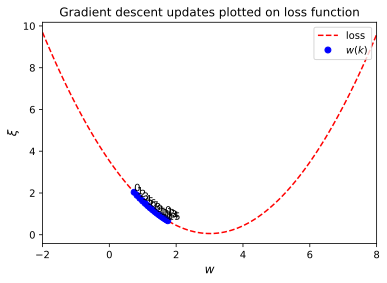

In [ ]:

plt.figure(figsize=(6, 4))
plt.plot(ws, loss_ws, 'r--', label='loss')
for i in range(0, len(w_loss)-1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.05, f'${i}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.05, f'${i+1}$')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(-2,8)
plt.legend(loc=1)
plt.show()

Attempting gradeint descent with 135 iterations.  
At w(133) the loss balances out as does not drop any lower.  
From this it can be said that the number of correct jumps needed to reach the lowest point is 133

In [ ]:
def gradient(w, x, t):
    """Gradient function. (Remember that y = nn(x, w) = x * w)"""
    return 2 * x * (nn(x, w) - t)


def delta_w(w_k, x, t, learning_rate):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(w_k, x, t))



w = np.random.rand()

learning_rate = 0.05


nb_of_iterations = 135
w_loss = [(w, loss(nn(x, w), t))]
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)
    w = w - dw
    w_loss.append((w, loss(nn(x, w), t)))
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

w(0): 0.1029 	 loss: 3.3056
w(1): 0.2145 	 loss: 3.0613
w(2): 0.3218 	 loss: 2.8354
w(3): 0.4250 	 loss: 2.6264
w(4): 0.5243 	 loss: 2.4332
w(5): 0.6197 	 loss: 2.2545
w(6): 0.7115 	 loss: 2.0893
w(7): 0.7998 	 loss: 1.9364
w(8): 0.8847 	 loss: 1.7951
w(9): 0.9663 	 loss: 1.6644
w(10): 1.0448 	 loss: 1.5435
w(11): 1.1203 	 loss: 1.4318
w(12): 1.1929 	 loss: 1.3284
w(13): 1.2627 	 loss: 1.2328
w(14): 1.3298 	 loss: 1.1444
w(15): 1.3944 	 loss: 1.0626
w(16): 1.4564 	 loss: 0.9870
w(17): 1.5161 	 loss: 0.9171
w(18): 1.5736 	 loss: 0.8524
w(19): 1.6288 	 loss: 0.7926
w(20): 1.6819 	 loss: 0.7373
w(21): 1.7329 	 loss: 0.6862
w(22): 1.7820 	 loss: 0.6389
w(23): 1.8293 	 loss: 0.5951
w(24): 1.8747 	 loss: 0.5547
w(25): 1.9183 	 loss: 0.5173
w(26): 1.9603 	 loss: 0.4827
w(27): 2.0007 	 loss: 0.4507
w(28): 2.0396 	 loss: 0.4211
w(29): 2.0769 	 loss: 0.3937
w(30): 2.1128 	 loss: 0.3684
w(31): 2.1474 	 loss: 0.3450
w(32): 2.1806 	 loss: 0.3234
w(33): 2.2125 	 loss: 0.3034
w(34): 2.2432 	 loss: 0.

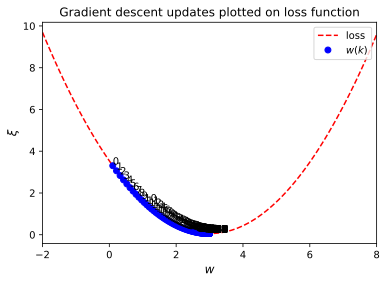

In [ ]:

plt.figure(figsize=(6, 4))
plt.plot(ws, loss_ws, 'r--', label='loss')
for i in range(0, len(w_loss)-1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.05, f'${i}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.05, f'${i+1}$')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(-2, 8)
plt.legend(loc=1)
plt.show()